In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline  

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

from utils import *
from utils_plotting import plot_embedding

# KiDS

In [3]:
kids = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.merged.cols.500k.csv')

Data shape: (502439, 37)
Droping NANs: 403753 left
Removing limiting magnitudes: 109024 left
Removing errors bigger than 1: 109011 left
Removing SExtractor flags: 83419 left
Removing KiDS flags: 71929 left


In [4]:
kids_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (91317, 44)
Droping NANs: 89513 left
Removing limiting magnitudes: 74196 left
Removing errors bigger than 1: 74191 left
Removing SExtractor flags: 45491 left
Removing KiDS flags: 37036 left
Cleaning SDSS: 33821 left


# R cuts

In [5]:
print(kids.loc[kids[MAG_GAAP_CALIB_R] < 22].shape)
print(kids.loc[kids[MAG_GAAP_CALIB_R] < 23].shape)
print(kids.loc[kids[MAG_GAAP_CALIB_R] < 24].shape)
print(kids.loc[kids[MAG_GAAP_CALIB_R] < 25].shape)
print(kids.loc[kids[MAG_GAAP_CALIB_R] < 26].shape)

(27334, 41)
(48242, 41)
(69260, 41)
(71929, 41)
(71929, 41)


# KiDS magnitudes

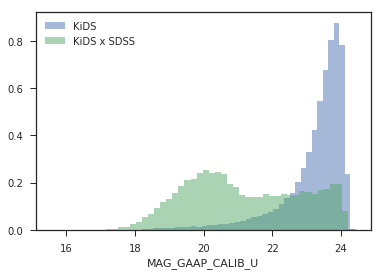

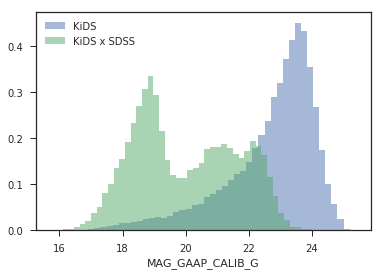

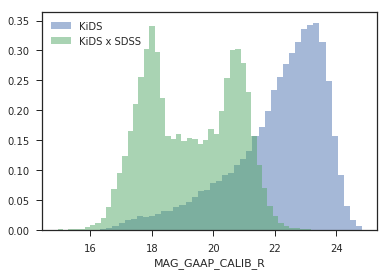

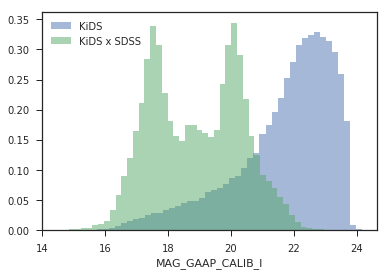

In [12]:
sns.set(style='ticks')
for b in BAND_CALIB_COLUMNS:
    plt.figure()
    sns.distplot(kids[b], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss[b], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS Colors

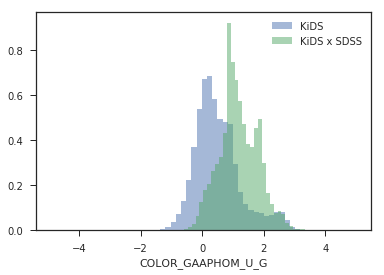

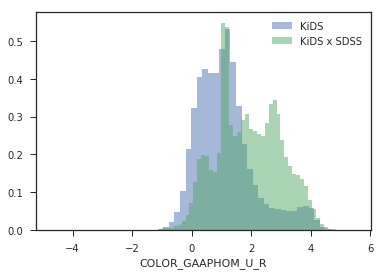

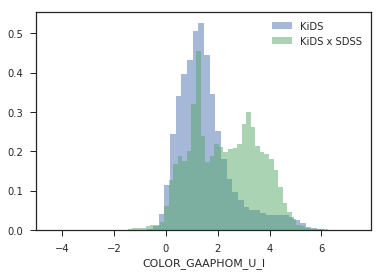

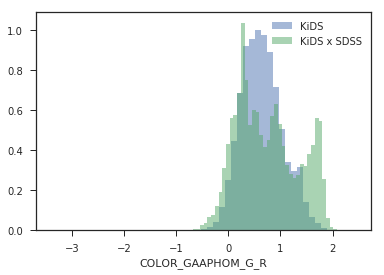

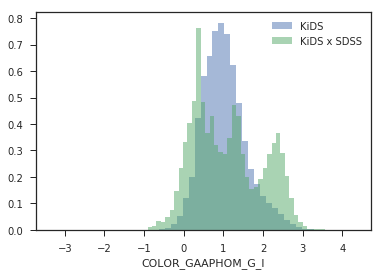

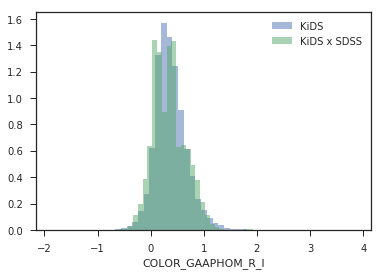

In [17]:
sns.set(style='ticks')
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS R < 22

In [18]:
kids_cut = kids.loc[kids[MAG_GAAP_R] < 22]
kids_x_sdss_cut = kids_x_sdss.loc[kids_x_sdss[MAG_GAAP_R] < 22]

In [19]:
print(kids.shape)
print(kids_cut.shape)

(72046, 41)
(25907, 41)


In [20]:
print(kids_x_sdss.shape)
print(kids_x_sdss_cut.shape)

(33880, 48)
(33528, 48)


In [21]:
print(np.unique(kids_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([17154,  6289, 10437]))


In [22]:
print(np.unique(kids_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([17117,  6015, 10396]))


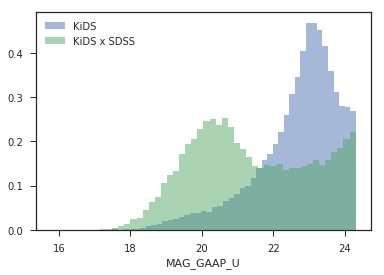

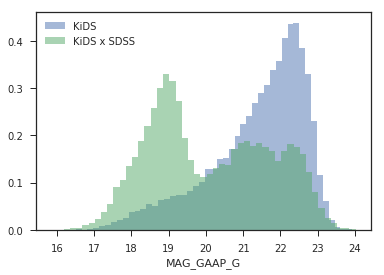

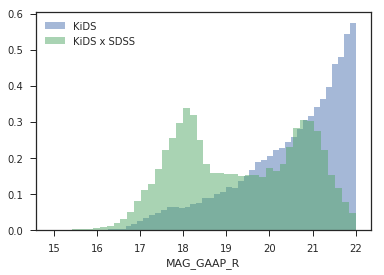

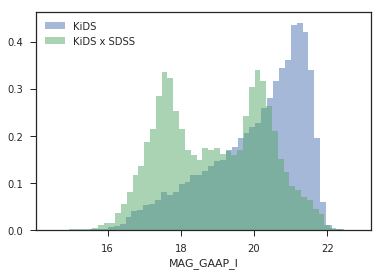

In [23]:
sns.set(style='ticks')
for c in BAND_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

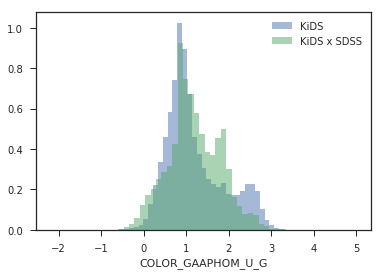

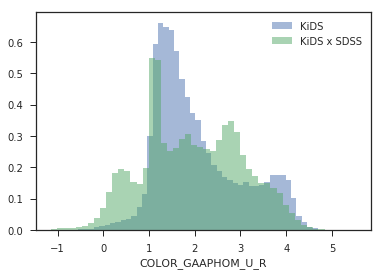

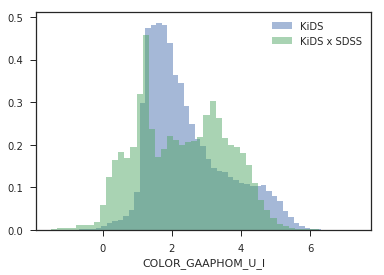

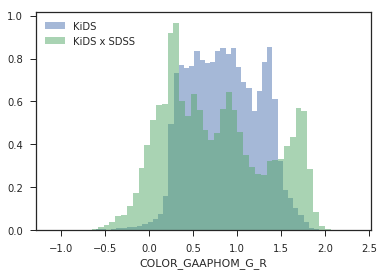

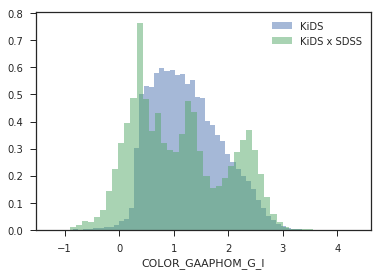

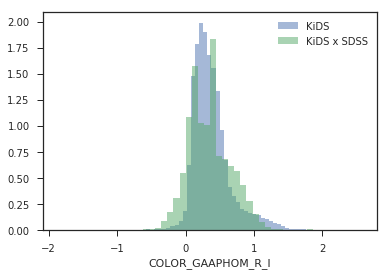

In [24]:
sns.set(style='ticks')
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS color cuts

In [39]:
kids_cut = kids.loc[kids[COLOR_GAAPHOM_U_G] > 0]
kids_x_sdss_cut = kids_x_sdss.loc[kids_x_sdss[COLOR_GAAPHOM_U_G] > 0]

In [40]:
print(kids.shape)
print(kids_cut.shape)

(72046, 41)
(54519, 41)


In [41]:
print(kids_x_sdss.shape)
print(kids_x_sdss_cut.shape)

(33880, 48)
(33056, 48)


In [42]:
print(np.unique(kids_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([17154,  6289, 10437]))


In [43]:
print(np.unique(kids_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([17124,  5667, 10265]))


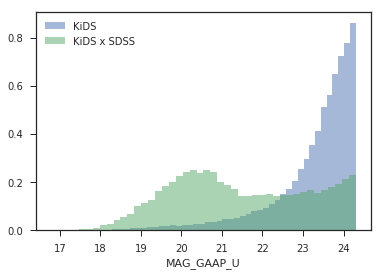

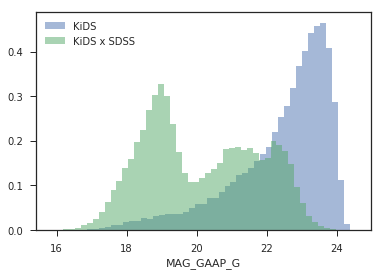

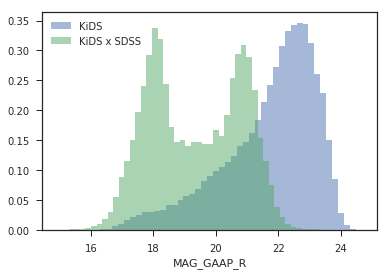

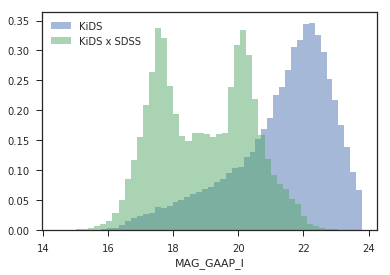

In [44]:
sns.set(style='ticks')
for c in BAND_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

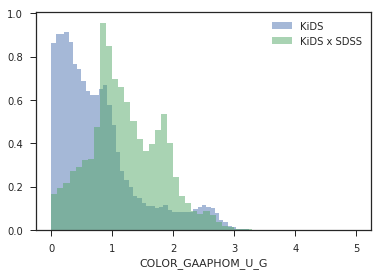

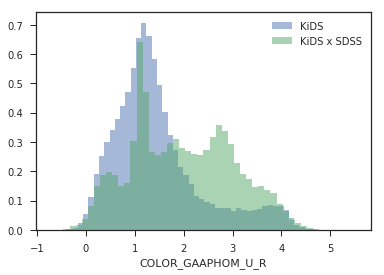

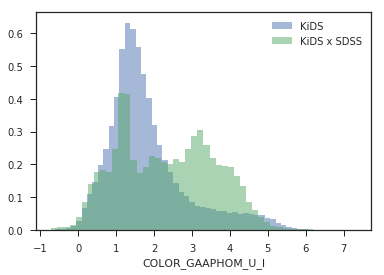

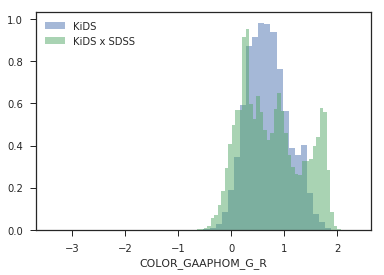

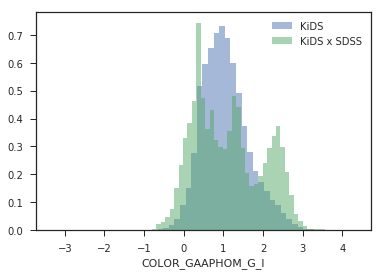

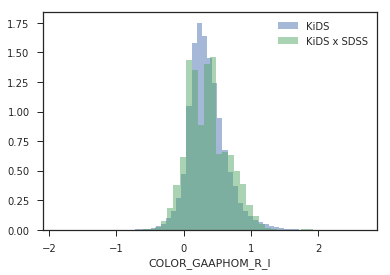

In [45]:
sns.set(style='ticks')
for c in COLOR_COLUMNS:
    plt.figure()
    sns.distplot(kids_cut[c], label='KiDS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    sns.distplot(kids_x_sdss_cut[c], label='KiDS x SDSS', kde=False, rug=False, hist_kws={'alpha': 0.5}, norm_hist=True)
    plt.legend()

# KiDS cut comparison with t-SNE

In [46]:
def add_cut_label(data):
    data['cut_label'] = 'left'
    data.loc[data[COLOR_GAAPHOM_U_G] < 0, 'cut_label'] = 'u-g_cut'
    data.loc[data[MAG_GAAP_R] > 22, 'cut_label'] = 'r_cut'
    data.loc[(data[MAG_GAAP_R] > 22) & (data[COLOR_GAAPHOM_U_G] < 0), 'cut_label'] = 'both_cuts'
    return data

In [47]:
kids_merged = kids_x_sdss.append(kids.loc[~kids['ID'].isin(kids_x_sdss['ID'])].sample(10000, random_state=1467))

In [48]:
kids_merged = add_cut_label(kids_merged)

In [49]:
kids_merged['is_in_SDSS'] = kids_merged['ID'].isin(kids_x_sdss['ID'])

In [50]:
kids_sampled = kids_merged.sample(10000, random_state=1467)

## KiDS colors + magnitudes

In [51]:
kids_features = MinMaxScaler().fit_transform(kids_sampled[np.concatenate([BAND_COLUMNS, COLOR_COLUMNS])])

In [52]:
kids_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                     n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=1,
                     random_state=4680, method='barnes_hut', angle=0.5).fit_transform(kids_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.005s...
[t-SNE] Computed neighbors for 10000 samples in 0.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.032850
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.409882
[t-SNE] Error after 1000 iterations: 1.119523


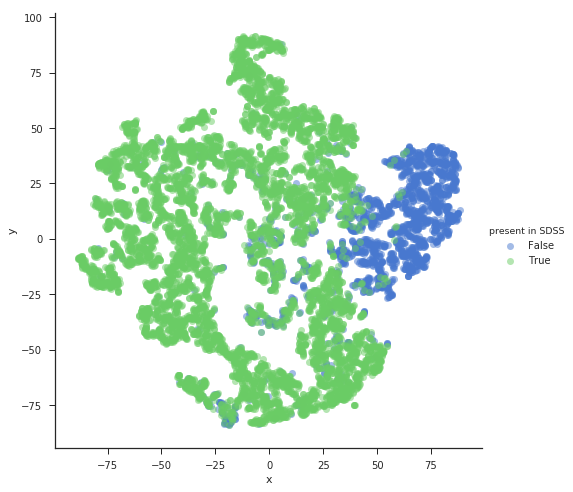

In [53]:
plot_embedding(kids_embedded, kids_sampled['is_in_SDSS'], label_name='present in SDSS')

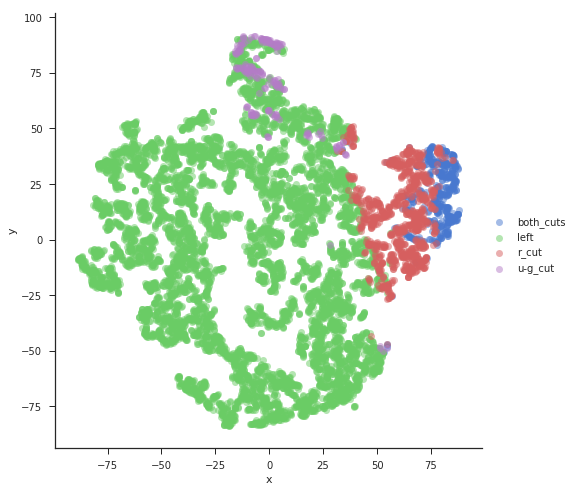

In [54]:
plot_embedding(kids_embedded, kids_sampled['cut_label'], label_name='')

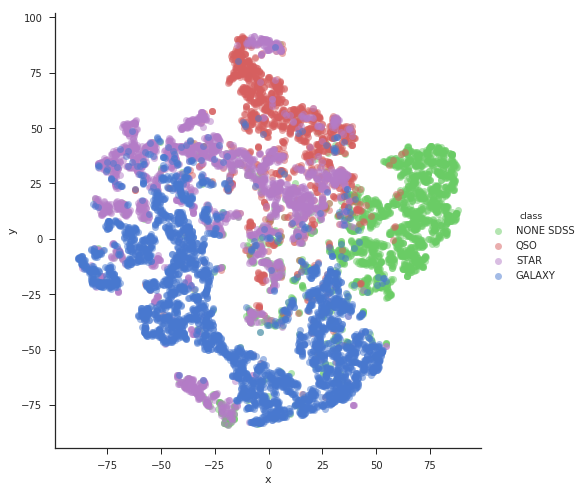

In [55]:
plot_embedding(kids_embedded, kids_sampled['CLASS'].fillna(value='NONE SDSS'))

## KiDS colors

In [56]:
kids_colors = MinMaxScaler().fit_transform(kids_sampled[COLOR_COLUMNS])

In [57]:
kids_colors_embedded = TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, learning_rate=200.0, n_iter=1000,
                            n_iter_without_progress=300, min_grad_norm=1e-07, metric='euclidean', init='random', verbose=1,
                            random_state=4680, method='barnes_hut', angle=0.5).fit_transform(kids_colors)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.012285
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.349670
[t-SNE] Error after 1000 iterations: 1.043765


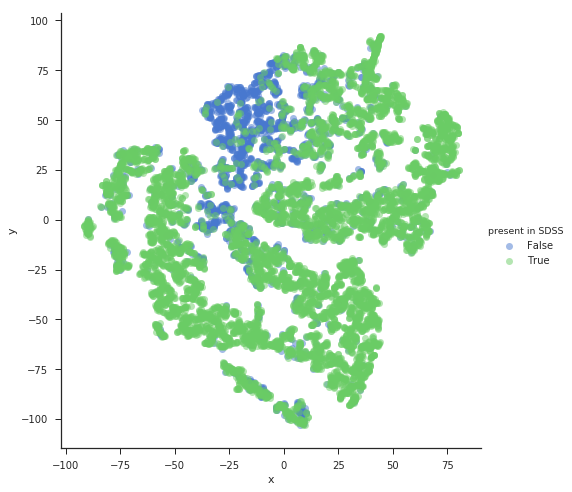

In [58]:
plot_embedding(kids_colors_embedded, kids_sampled['is_in_SDSS'], label_name='present in SDSS')

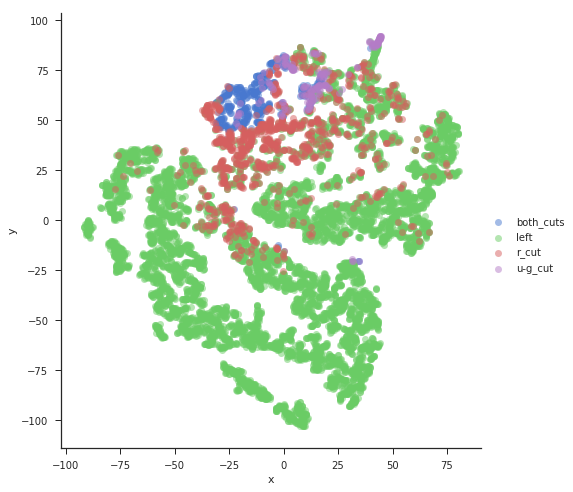

In [59]:
plot_embedding(kids_colors_embedded, kids_sampled['cut_label'], label_name='')

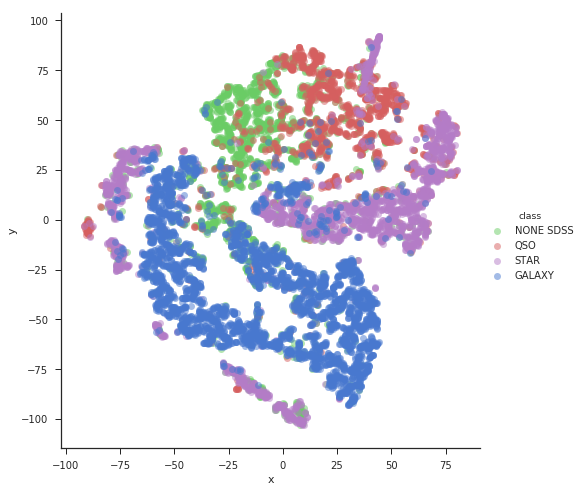

In [60]:
plot_embedding(kids_colors_embedded, kids_sampled['CLASS'].fillna(value='NONE SDSS'))

# KiDS STAR

In [62]:
kids_star = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.cols.csv')

Data shape: (4514831, 37)
Droping NANs: 4053246 left
Removing limiting magnitudes: 2286021 left
Removing errors bigger than 1: 2285941 left
Removing SExtractor flags: 1690689 left
Removing ima-flags: 1402259 left


In [64]:
kids_star_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.STAR.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (30940, 42)
Droping NANs: 30679 left
Removing limiting magnitudes: 29514 left
Removing errors bigger than 1: 29514 left
Removing SExtractor flags: 23446 left
Removing ima-flags: 18829 left
Cleaning SDSS: 16056 left


## R cut

In [65]:
kids_star_cut = kids_star.loc[kids_star[MAG_GAAP_R] < 22]
kids_star_x_sdss_cut = kids_star_x_sdss.loc[kids_star_x_sdss[MAG_GAAP_R] < 22]

In [66]:
print(kids_star.shape)
print(kids_star_cut.shape)

(1402259, 41)
(1095613, 41)


In [67]:
print(kids_star_x_sdss.shape)
print(kids_star_x_sdss_cut.shape)

(16056, 46)
(15793, 46)


In [68]:
print(np.unique(kids_star_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  102,  5680, 10274]))


In [69]:
print(np.unique(kids_star_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  101,  5455, 10237]))


## Color cut

In [70]:
kids_star_cut = kids_star.loc[kids_star[COLOR_GAAPHOM_U_G] > 0]
kids_star_x_sdss_cut = kids_star_x_sdss.loc[kids_star_x_sdss[COLOR_GAAPHOM_U_G] > 0]

In [71]:
print(kids_star.shape)
print(kids_star_cut.shape)

(1402259, 41)
(1342732, 41)


In [72]:
print(kids_star_x_sdss.shape)
print(kids_star_x_sdss_cut.shape)

(16056, 46)
(15287, 46)


In [73]:
print(np.unique(kids_star_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([  102,  5680, 10274]))


In [74]:
print(np.unique(kids_star_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([   96,  5088, 10103]))


# KiDS GAIA

In [75]:
kids_gaia = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.cols.csv')

Data shape: (1525462, 37)
Droping NANs: 1515124 left
Removing limiting magnitudes: 1359837 left
Removing errors bigger than 1: 1359825 left
Removing SExtractor flags: 913195 left
Removing ima-flags: 722284 left


In [76]:
kids_gaia_x_sdss = process_kids('/media/snakoneczny/data/KiDS/KiDS.DR3.x.GAIA.x.SDSS.DR14.cols.csv', sdss_cleaning=True)

Data shape: (29297, 42)
Droping NANs: 29210 left
Removing limiting magnitudes: 28825 left
Removing errors bigger than 1: 28825 left
Removing SExtractor flags: 19248 left
Removing ima-flags: 15009 left
Cleaning SDSS: 14438 left


## R cut

In [77]:
kids_gaia_cut = kids_gaia.loc[kids_gaia[MAG_GAAP_R] < 22]
kids_gaia_x_sdss_cut = kids_gaia_x_sdss.loc[kids_gaia_x_sdss[MAG_GAAP_R] < 22]

In [78]:
print(kids_gaia.shape)
print(kids_gaia_cut.shape)

(722284, 41)
(722277, 41)


In [79]:
print(kids_gaia_x_sdss.shape)
print(kids_gaia_x_sdss_cut.shape)

(14438, 46)
(14437, 46)


In [80]:
print(np.unique(kids_gaia_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3024, 3547, 7867]))


In [81]:
print(np.unique(kids_gaia_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3024, 3547, 7866]))


## Color cut

In [82]:
kids_gaia_cut = kids_gaia.loc[kids_gaia[COLOR_GAAPHOM_U_G] > 0]
kids_gaia_x_sdss_cut = kids_gaia_x_sdss.loc[kids_gaia_x_sdss[COLOR_GAAPHOM_U_G] > 0]

In [83]:
print(kids_gaia.shape)
print(kids_gaia_cut.shape)

(722284, 41)
(718686, 41)


In [84]:
print(kids_gaia_x_sdss.shape)
print(kids_gaia_x_sdss_cut.shape)

(14438, 46)
(13877, 46)


In [85]:
print(np.unique(kids_gaia_x_sdss['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3024, 3547, 7867]))


In [86]:
print(np.unique(kids_gaia_x_sdss_cut['CLASS'], return_counts=True))

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([3024, 3062, 7791]))
